# PREDICTION OF CAR PRICE PROJECT

Industry-OASIS INFOBYTE

Contribution-Individual

Member Name-ASSALA IDDOUB

# Project Overview:

 Car Price Prediction
Objective
The primary goal of this project is to develop a machine learning model capable of predicting the price of a car based on various features such as brand, model, year, horsepower, mileage, and other relevant factors. Accurate car price prediction can be valuable for both buyers and sellers, helping them make informed decisions in the automotive market.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df=pd.read_csv('C:\\Users\\Assala\\Dropbox\\PC\\Downloads\\archive (2)\\car data.csv')

In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
# Display the first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
#display the tai of the dataset
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [25]:
#statistical description
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
#check the rows and colomns
df.shape

(301, 9)

In [14]:
#display information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
#Hide memory usage
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)

In [16]:
#count missing value for each column
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
#display columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
#number of unique values for each columns
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [28]:
#Mean selling price for each Fuel_Type
mean_selling_price_by_fuel = df.groupby('Fuel_Type')['Selling_Price'].mean()
print(mean_selling_price_by_fuel)

Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64


In [29]:
#max driven_kms for each owner
max_kms_by_owner = df.groupby('Owner')['Driven_kms'].max()
print(max_kms_by_owner)

Owner
0    500000
1     58000
3    142000
Name: Driven_kms, dtype: int64


In [30]:
#distribution of cars across different years
yearly_distribution = df['Year'].value_counts().sort_index()
print(yearly_distribution)

2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Year, dtype: int64


In [34]:
#percentage of cars with different sell types
selling_type_percentages = df['Selling_type'].value_counts(normalize=True) * 100
print(selling_type_percentages)

Dealer        64.784053
Individual    35.215947
Name: Selling_type, dtype: float64


In [31]:
#Median present_price from different years
median_present_price_by_year = df.groupby('Year')['Present_Price'].median()
print(median_present_price_by_year)

Year
2003     5.130
2004    12.350
2005    11.835
2006     5.875
2007     0.665
2008     0.750
2009    10.500
2010     7.500
2011     4.600
2012     5.980
2013     5.700
2014     6.835
2015     7.200
2016     5.800
2017     5.430
2018     9.830
Name: Present_Price, dtype: float64


In [35]:
#average selling price for cars with different transmissions
avg_selling_price_by_transmissions = df.groupby('Transmission')['Selling_Price'].mean()
print(avg_selling_price_by_transmissions)

Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64


# EXPLORATORAY ANALYSIS

# UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Distribution of Selling Prices')

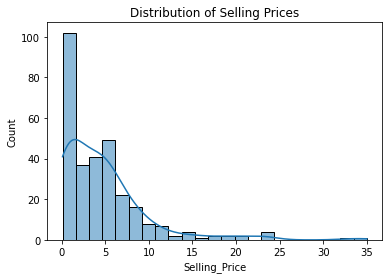

In [37]:
#distrubution of selling  prices
selling_price_distribution = df['Selling_Price']
sns.histplot(selling_price_distribution, kde=True); 
plt.title('Distribution of Selling Prices')

In [38]:
#unique fuel_types in dataset
unique_fuel_types = df['Fuel_Type'].unique()
print(unique_fuel_types)

['Petrol' 'Diesel' 'CNG']


C:\Users\Assala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Spread of Present Prices')

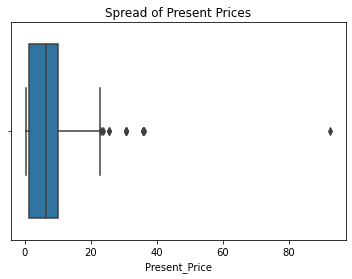

In [53]:
#spread of present prices for the cars
present_price_spread = df['Present_Price']
sns.boxplot(present_price_spread); 
plt.title('Spread of Present Prices')

Text(0.5, 1.0, 'Distribution of Driven Kilometers')

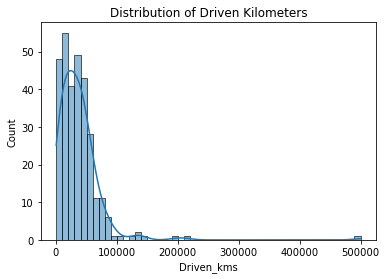

In [40]:
#kilometer driven distibuted in the dataset
driven_kms_distribution = df['Driven_kms']
sns.histplot(driven_kms_distribution, kde=True); 
plt.title('Distribution of Driven Kilometers')

In [41]:
#predominant transmission type in the dataset
transmission_distribution = df['Transmission'].value_counts()
print(transmission_distribution)

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [42]:
#count the unique name of the car in the dataset
unique_car_names = df['Car_Name'].nunique()
print(unique_car_names)

98


In [43]:
#average selling price for each year
avg_selling_price_by_year = df.groupby('Year')['Selling_Price'].mean()
print(avg_selling_price_by_year)

Year
2003    1.300000
2004    1.500000
2005    2.487500
2006    1.437500
2007    0.160000
2008    1.002857
2009    2.816667
2010    5.262667
2011    2.375263
2012    3.841304
2013    3.540909
2014    4.762105
2015    5.927049
2016    5.213200
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64


In [44]:
#cars associated with each selling types
selling_type_counts = df['Selling_type'].value_counts()
print(selling_type_counts)

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [45]:
#distribution of owner count for each in the datasets
owner_distribution = df['Owner'].value_counts()
print(owner_distribution)

0    290
1     10
3      1
Name: Owner, dtype: int64


# BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Selling Price by Selling Type')

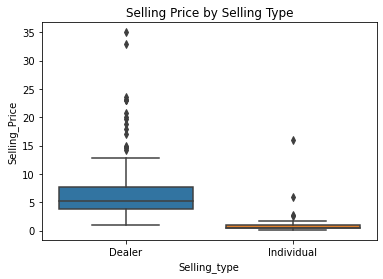

In [46]:
#selling price variation by selling type
selling_price_by_selling_type = sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Selling Price by Selling Type')

Text(0.5, 1.0, 'Selling Price by Car Name')

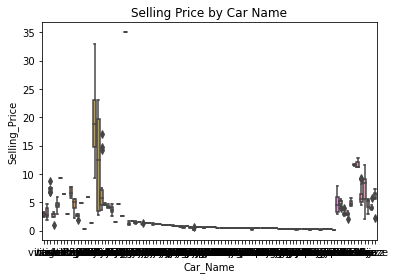

In [47]:
#selling distributed among different car names
selling_price_by_car_name = sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
plt.title('Selling Price by Car Name')

Text(0.5, 1.0, 'Selling Price by Fuel Type for Manual Transmission')

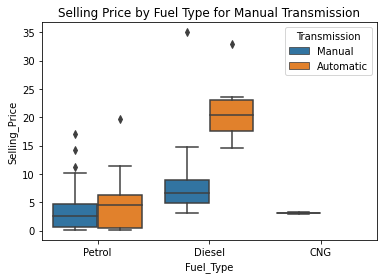

In [48]:
#selling price of the cars by fuel typs and type of transmission
selling_price_by_fuel_and_transmission = sns.boxplot(x='Fuel_Type', y='Selling_Price', hue='Transmission', data=df)
plt.title('Selling Price by Fuel Type for Manual Transmission')

In [49]:
#correlation between  the present price and the year of the cars
correlation_present_year = df[['Present_Price', 'Year']].corr()
print(correlation_present_year)

               Present_Price      Year
Present_Price       1.000000 -0.047192
Year               -0.047192  1.000000


Text(0.5, 1.0, 'Selling Price vs. Present Price')

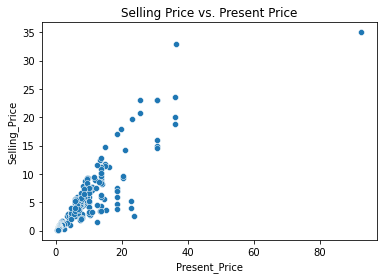

In [54]:
#how does selling price vary with the present price of the car
selling_vs_present_price = sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs. Present Price')

In [57]:
#correlation between present_price and driven_kilometers
correlation_present_driven_kms = df[['Present_Price', 'Driven_kms']].corr()
print(correlation_present_driven_kms)

               Present_Price  Driven_kms
Present_Price       1.000000    0.203618
Driven_kms          0.203618    1.000000


Text(0.5, 1.0, 'Selling Price by Transmission Type')

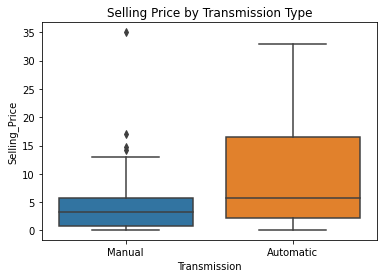

In [58]:
#selling price by transmission types
selling_price_by_transmission = sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission Type')

Text(0.5, 1.0, 'Selling Price vs. Owner')

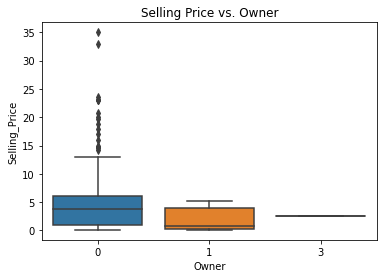

In [59]:
#relation between the selling price and owner count owner count
selling_vs_owner = sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title('Selling Price vs. Owner')

In [60]:
#correlation between seeling price and driven kilometers
correlation_selling_driven_kms = df[['Selling_Price', 'Driven_kms']].corr()
print(correlation_selling_driven_kms)

               Selling_Price  Driven_kms
Selling_Price       1.000000    0.029187
Driven_kms          0.029187    1.000000


# MULTIVARIATE ANALYSIS

# How does the distribution of 'Selling_Price,' 'Present_Price,' and 'Driven_kms' vary based on the 'Transmission' type of the cars, and what insights can be drawn from the overlaid Kernel Density Estimate (KDE) in each subplot?

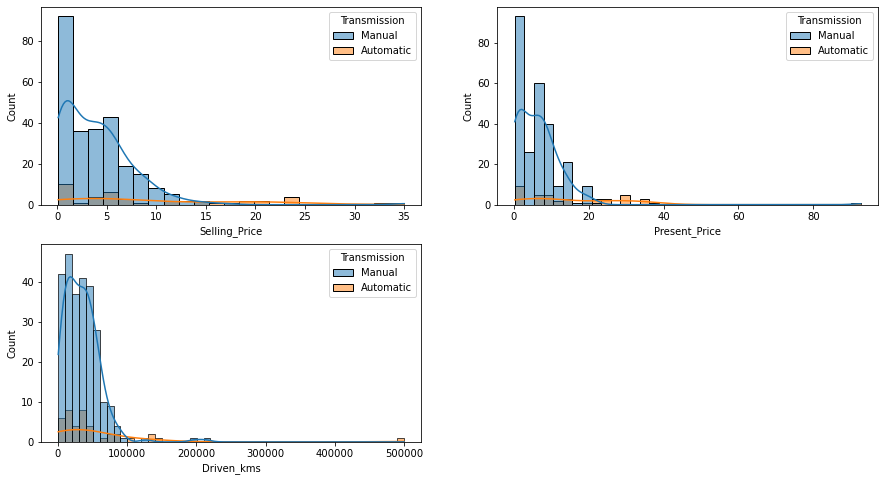

In [61]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
plt.show()

# How does the distribution of 'Selling_Price,' 'Present_Price,' and 'Driven_kms' vary concerning both 'Transmission' and 'Owner' categories, and what insights can be derived from the horizontal boxplots for each combination of variables?

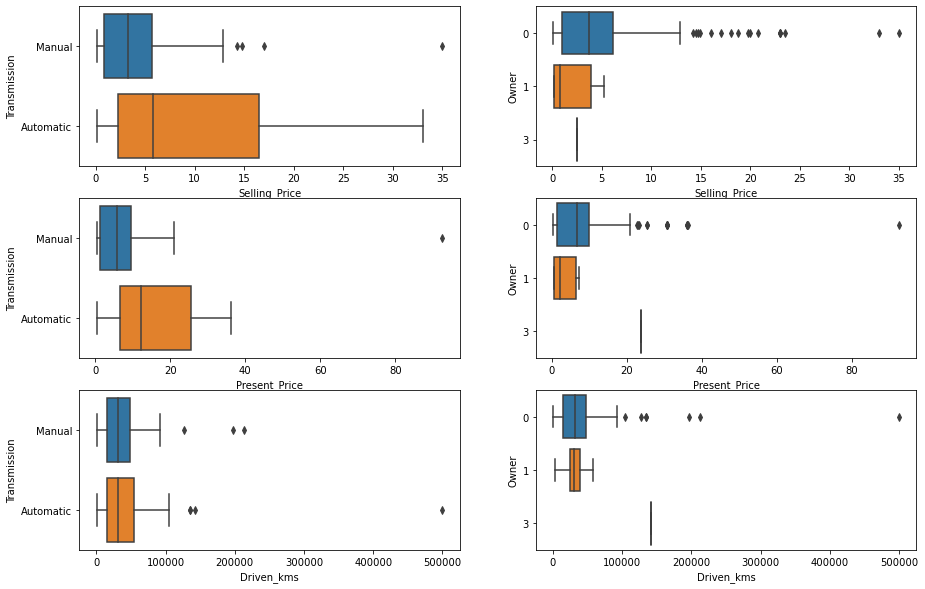

In [62]:
plt.figure(figsize = (15,10))
for i,col in enumerate(['Selling_Price','Present_Price', 'Driven_kms']):
    for j,col2 in enumerate(['Transmission', 'Owner']):
        plt.subplot(3,2,i * 2 + j + 1)
        sns.boxplot(data = df, y = col2,x = col,orient = 'h')

# How does the pair plot visualization of numerical variables in the dataset, with 'Transmission' as the hue, reveal patterns and relationships between variables, especially in terms of different transmission types?

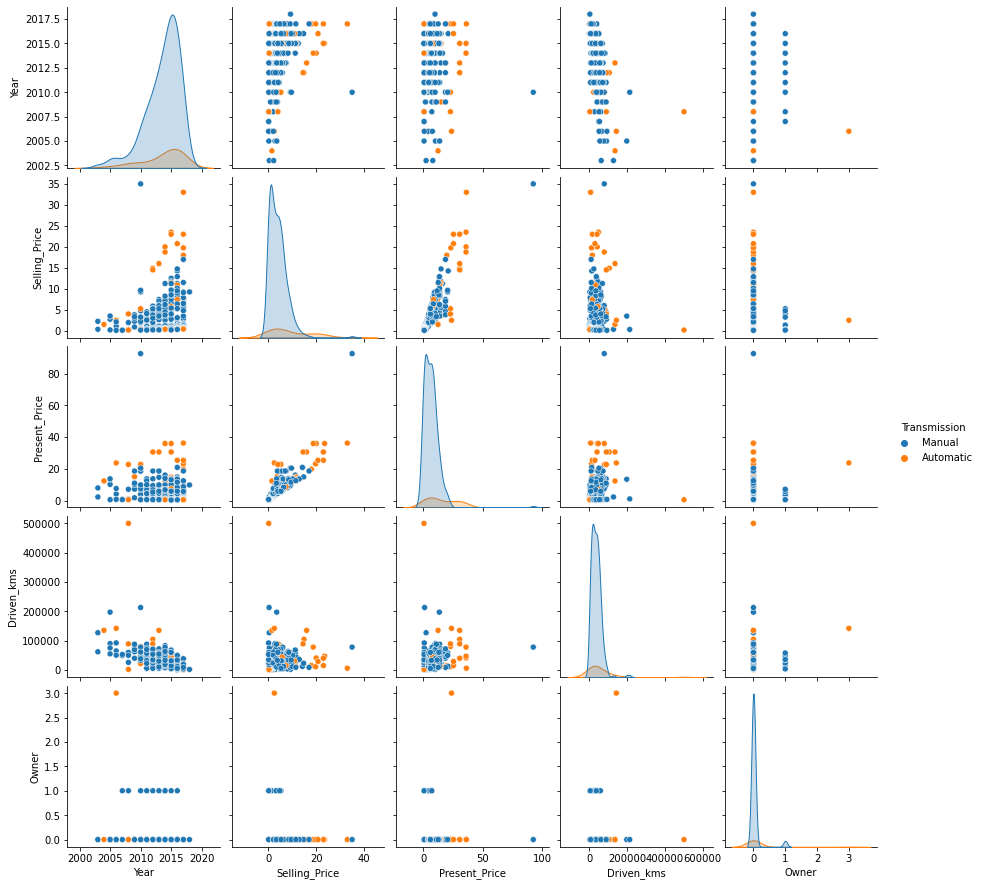

In [63]:
sns.pairplot(data = df , hue = 'Transmission')

# How does the correlation heatmap for the numerical columns 'Year,' 'Selling_Price,' 'Present_Price,' 'Driven_kms,' and 'Owner' reveal relationships and dependencies between these variables, and what insights can be drawn from the strength and direction of the correlation coefficients?

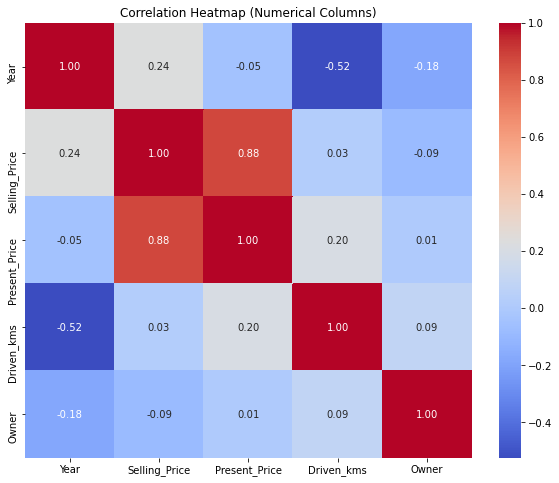

In [64]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

#  Categorical Data Encoding using LabelEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
encoded_df = df.copy()

# Apply LabelEncoder to 'Fuel_Type', 'Selling_type', and 'Transmission'
label_encoder = LabelEncoder()
encoded_df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
encoded_df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
encoded_df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

# Display the encoded distribution of categorical data
print("Encoded Fuel_Type:\n", encoded_df['Fuel_Type'].value_counts())
print("\nEncoded Selling_type:\n", encoded_df['Selling_type'].value_counts())
print("\nEncoded Transmission:\n", encoded_df['Transmission'].value_counts())


Encoded Fuel_Type:
 2    239
1     60
0      2
Name: Fuel_Type, dtype: int64

Encoded Selling_type:
 0    195
1    106
Name: Selling_type, dtype: int64

Encoded Transmission:
 1    261
0     40
Name: Transmission, dtype: int64


In [66]:
#check distribution of categorical data
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [68]:

df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# DATA PREPARATION FOR PREDICTIVE MODELING

In [70]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [71]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [72]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [74]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Initialize and train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=13)
model.fit(X_train, Y_train)

# Step 4: Evaluate the model
Y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 1.33
R-squared (R2): 0.95


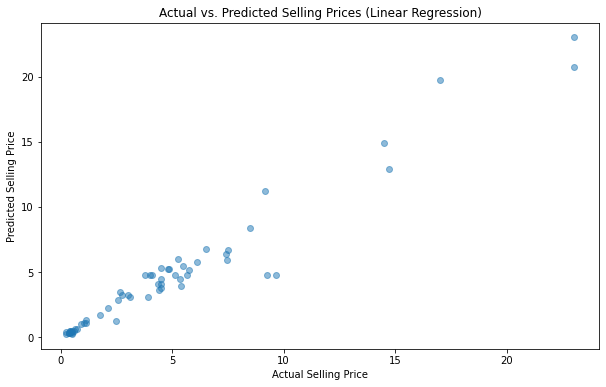

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()


In [76]:
# Assuming X and Y are defined as in your previous code
# X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
# Y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on new data (for example, using X_test)
predicted_prices = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, predicted_prices)
r2 = r2_score(Y_test, predicted_prices)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 10.31
R-squared (R2): 0.77


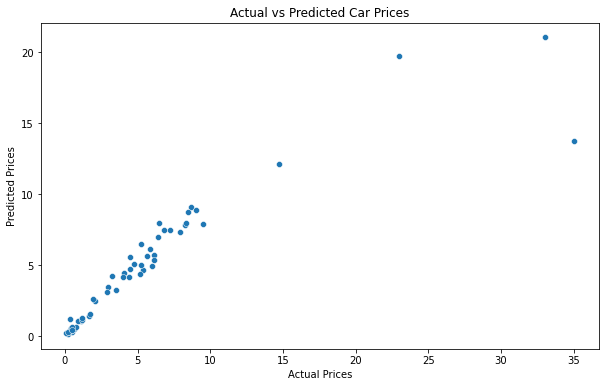

In [77]:
# Scatter plot for predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=predicted_prices)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [78]:

# Assuming X and Y are defined as in your previous code
# X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
# Y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, Y_train)

# Make predictions on new data (for example, using X_test)
predicted_prices = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, predicted_prices)
r2 = r2_score(Y_test, predicted_prices)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 7.36
R-squared (R2): 0.83


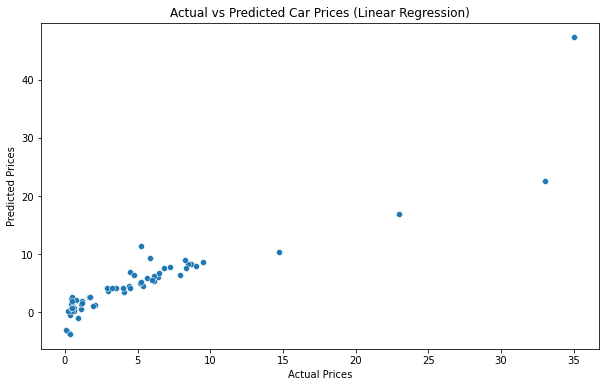

In [79]:
# Scatter plot for predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=predicted_prices)
plt.title('Actual vs Predicted Car Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

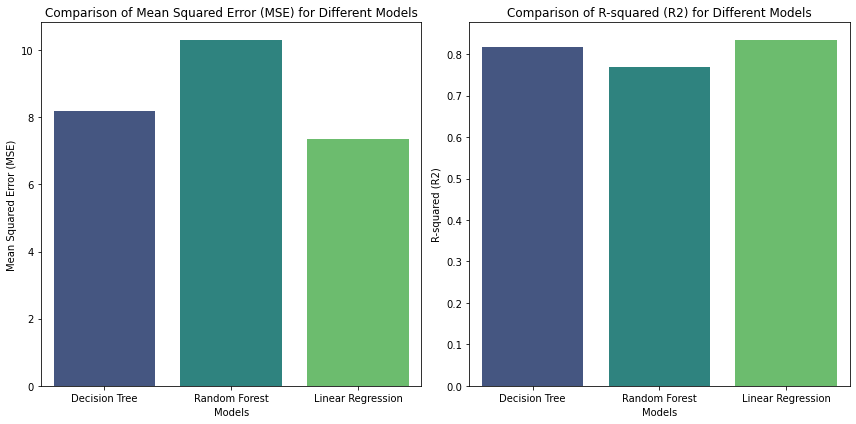

In [90]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']
# Split the data into training and testing sets for fair comparison
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

# Initialize and train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=13)
dt_model.fit(X_train, Y_train)
dt_Y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(Y_test, dt_Y_pred)
dt_r2 = r2_score(Y_test, dt_Y_pred)

# Create and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)
rf_model.fit(X_train, Y_train)
rf_Y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_Y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(Y_test, linear_Y_pred)
linear_r2 = r2_score(Y_test, linear_Y_pred)

# Display the comparison graph
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
mse_values = [dt_mse, rf_mse, linear_mse]
r2_values = [dt_r2, rf_r2, linear_r2]

# Bar chart for Mean Squared Error (MSE)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')

# Bar chart for R-squared (R2)
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_values, palette='viridis')
plt.title('Comparison of R-squared (R2) for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')

plt.tight_layout()
plt.show()